In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

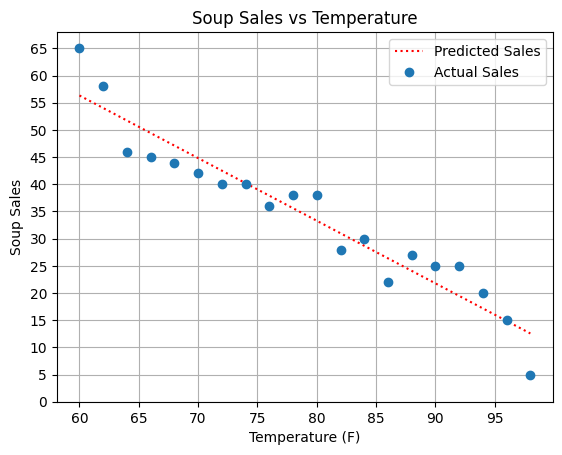

In [22]:
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

line_fitter = LinearRegression()
line_fitter.fit(temperature,sales)
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict,'r:')
plt.plot(temperature, sales, 'o')
plt.xlabel('Temperature (F)')
plt.title('Soup Sales vs Temperature')
plt.ylabel('Soup Sales')
plt.xticks(np.arange(60, 100, 5))
plt.yticks(np.arange(0, 70, 5))
plt.grid()
plt.legend(['Predicted Sales', 'Actual Sales'])
plt.show()

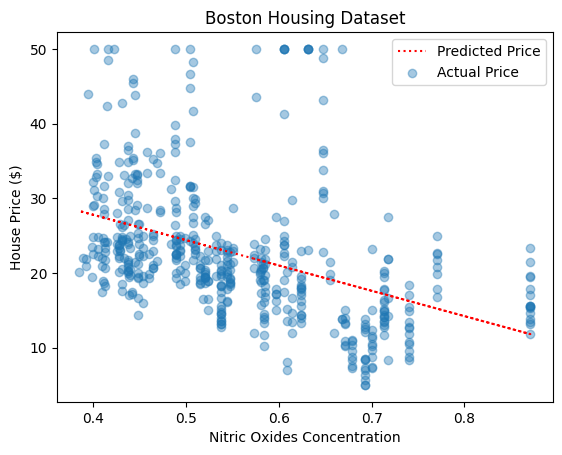

In [23]:
df = pd.read_csv('HousingData.csv')

X = df['NOX'].values.reshape(-1, 1)
y = df['MEDV']

fitter = LinearRegression()
fitter.fit(X,y)
y_p = fitter.predict(X)

plt.plot(X,y_p,'r:')
plt.scatter(X, y, alpha=0.4)
plt.title("Boston Housing Dataset")
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("House Price ($)")
plt.legend(['Predicted Price', 'Actual Price'])
plt.show()

[-88303.18915238]
181208083.10732976


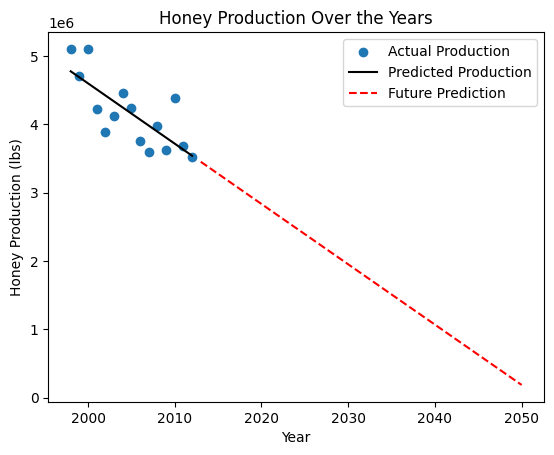

In [24]:
df = pd.read_csv("honeyproduction.csv")
prod_per_year = df.groupby(['year'])['totalprod'].mean().reset_index()

X = prod_per_year['year'].values.reshape(-1, 1)
y = prod_per_year['totalprod']

regr = LinearRegression()
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

y_predict = regr.predict(X)

plt.scatter(X,y)
plt.plot(X,y_predict,'k-')

X_future = np.array(range(2013,2051)).reshape(-1,1)
future_predict = regr.predict(X_future)

plt.plot(X_future,future_predict, 'r--')
plt.title("Honey Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Honey Production (lbs)")
plt.legend(['Actual Production','Predicted Production', 'Future Prediction'])
plt.show()


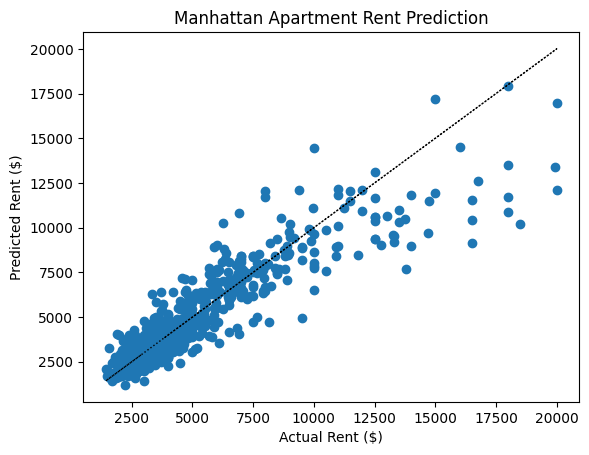

R^2 on training set: 0.773
R^2 on test set: 0.805

Coefficients:
	 bedrooms: -302.730
	 bathrooms: 1199.386
	 size_sqft: 4.800
	 min_to_subway: -24.290
	 floor: 24.198
	 building_age_yrs: -7.583
	 no_fee: -140.907
	 has_roofdeck: 48.850
	 has_washer_dryer: 191.426
	 has_doorman: -151.115
	 has_elevator: 89.409
	 has_dishwasher: -57.897
	 has_patio: -19.319
	 has_gym: -38.924


In [25]:
df = pd.read_csv("manhattan.csv")
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

plt.scatter(y_test,y_predict)
plt.xlabel("Actual Rent ($)")
plt.ylabel("Predicted Rent ($)")
plt.plot(y_test, y_test, ':', linewidth=1, color='black')  # Line for perfect prediction
plt.title("Manhattan Apartment Rent Prediction")
plt.show()

r2_train = mlr.score(x_train, y_train)
r2_test = mlr.score(x_test, y_test)

print(f"R^2 on training set: {r2_train:.3f}")
print(f"R^2 on test set: {r2_test:.3f}\n")

print("Coefficients:")
for feature, coef in zip(x.columns, mlr.coef_[0]):
    print(f"\t {feature}: {coef:.3f}") 